# 교차 검증과 그리드 서치

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/rickiepark/hg-mldl/blob/master/5-2.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />구글 코랩에서 실행하기</a>
  </td>
</table>

## 검증 세트

* 테스트 세트를 사용하지 않으면 모델이 과대적합인지 과소적합인지 판단하기 어렵습니다. 테스트 세트를 사용하지 않고 이를 측정하는 간단한 방법은 훈련 세트를 또 나누어 검증 세트(validation set)를 생성하는 것입니다.
* 이 방법은 너무 단순하고 실제로 많이 사용하는 방식입니다. 

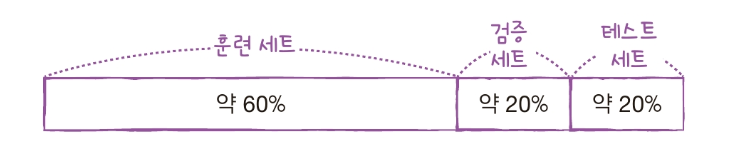


* 훈련 세트에서 모델을 훈련하고 검증 세트로 모델을 평가 
* 이런 식으로 테스트하고 싶은 매개변수를 바꿔가며 가장 좋은 모델을 선택합니다. 
* 그 다음 이 매개변수를 사용해 훈련 세트와 검증 세트를 합쳐 전체 훈련 데이터에서 모델을 다시 훈련합니다. 그리고 마지막 테스트 세트에서 최종 점수를 평가합니다. 

In [1]:
import pandas as pd

wine = pd.read_csv('https://bit.ly/wine-date')

In [2]:
data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class'].to_numpy()

In [3]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    data, target, test_size=0.2, random_state=42)

* 훈련 데이터에서 검증 테이터를 분리합니다. 

In [4]:
sub_input, val_input, sub_target, val_target = train_test_split(
    train_input, train_target, test_size=0.2, random_state=42)

* 데이터 비율 조사

In [5]:
print(sub_input.shape, val_input.shape)

(4157, 3) (1040, 3)


In [6]:
val_input.shape

(1040, 3)

In [7]:
test_input.shape

(1300, 3)

In [8]:
data.shape

(6497, 3)

In [9]:
(6497 -1300) * 0.2

1039.4

## 모델 생성

In [10]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(sub_input, sub_target)

print(dt.score(sub_input, sub_target))
print(dt.score(val_input, val_target))

0.9971133028626413
0.864423076923077


## 교차 검증
* 검증 세트를 만드느나 훈련 세트가 줄었습니다. 보통 많은 데이터를 훈련에 사용할수록 좋은 모델이 만들어집니다. 
* 그렇다고 검증 세트를 너무 조금 떼어 놓으면 검증 점수가 들쭉날쭉하고 불안정할 것입니다. 
* 이럴 때 교차 검증(cross validation)을 이용하면 안정적인 검증 점수를 얻고 훈련에 더 많은 데이터를 사용할 수 있습니다. 

* 교차 검증은 검증 세트를 떼어 내어 평가하는 과정을 여러 번 반복합니다. 
* 그 다음 이 점수를 평균하여 최종 검증 점수를 얻습니다. 

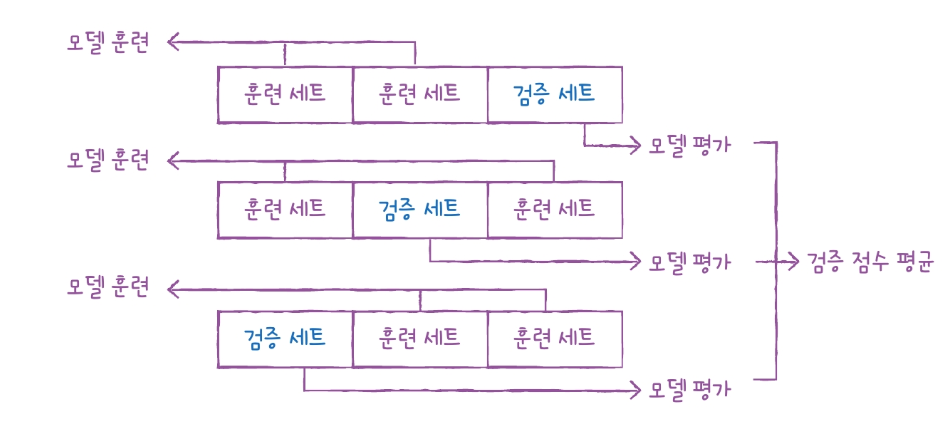

* 훈련 세트를 세 부분으로 나눠서 교차 검증을 수행하는 것을 3-폴드 교차 검증이라고 합니다. 통칭 k-fold 교차 검증이라고 하며, 훈련 세트를 몇 부분으로 나누냐에 따라 다르게 부릅니다. 

In [12]:
from sklearn.model_selection import cross_validate

scores = cross_validate(dt, train_input, train_target)
print(scores)

{'fit_time': array([0.00712752, 0.00549746, 0.00790381, 0.00540781, 0.00672126]), 'score_time': array([0.        , 0.00046372, 0.        , 0.00095439, 0.00090837]), 'test_score': array([0.86923077, 0.84615385, 0.87680462, 0.84889317, 0.83541867])}


* cv 값에 따라서 k값이 달라짐
* k의 기본값은 5

In [14]:
from sklearn.model_selection import cross_validate

scores = cross_validate(dt, train_input, train_target, cv=20)
print(scores)

{'fit_time': array([0.00748563, 0.00695729, 0.00696516, 0.00773954, 0.00800228,
       0.00758195, 0.00644159, 0.00758815, 0.00894713, 0.00963497,
       0.00835538, 0.00682521, 0.0078001 , 0.00891519, 0.00968027,
       0.00940585, 0.00876212, 0.00565815, 0.        , 0.01586604]), 'score_time': array([0.        , 0.00085163, 0.00091767, 0.        , 0.00201988,
       0.        , 0.0013938 , 0.        , 0.00082827, 0.00098658,
       0.        , 0.        , 0.00094461, 0.        , 0.00093055,
       0.00235057, 0.        , 0.        , 0.        , 0.        ]), 'test_score': array([0.85      , 0.83461538, 0.85384615, 0.87692308, 0.85      ,
       0.88461538, 0.83846154, 0.86153846, 0.87692308, 0.89615385,
       0.86538462, 0.88076923, 0.86923077, 0.85384615, 0.87307692,
       0.88461538, 0.85384615, 0.86872587, 0.84942085, 0.83783784])}


* 처음 2개의 키는 각각 모델을 훈련하는 시간과 검증하는 시간을 의미합니다. cross_validate() 함수는 기본적으로 k-fold 교차 검증을 하기 때문에 각 키마다 5개의 숫자가 담겨있습니다. 

In [15]:
import numpy as np

print(np.mean(scores['test_score']))

0.8629915354915356


* cross_validate()는 훈련 세트를 섞어 폴드를 나누지 않습니다. 
* 교차 검증을 할 때 훈련 세트를 섞을 필요가 있을 때 StratifiedKFold를 사용합니다. 

In [16]:
from sklearn.model_selection import StratifiedKFold

scores = cross_validate(dt, train_input, train_target, cv=StratifiedKFold())
print(np.mean(scores['test_score']))

0.855300214703487


* n_splits의 값을 10으로 설정하여 10-fold 교차 검증을 진행합니다. 

In [17]:
splitter = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_validate(dt, train_input, train_target, cv=splitter)
print(np.mean(scores['test_score']))

0.8574181117533719


### iris 데이터를 통한 교차검증

In [18]:
from sklearn.datasets import load_iris

In [19]:
iris = load_iris()

In [20]:
iris_data = iris.data

In [21]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [22]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [23]:
iris_data.shape

(150, 4)

In [26]:
scores = cross_validate(dt, iris_data, iris.target, cv=3)

In [27]:
scores['test_score'].mean()

0.96

In [28]:
splitter = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_validate(dt, iris_data, iris.target, cv=splitter)
print(np.mean(scores['test_score']))

0.9533333333333335


## KFold 클래스

In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
import numpy as np

iris = load_iris()
features = iris.data
label = iris.target
dt_clf = DecisionTreeClassifier(random_state=156)

# 5개의 폴드 세트로 분리하는 KFold 객체와 폴드 세트별 정확도를 담을 리스트 객체 생성.
kfold = KFold(n_splits=5)
cv_accuracy = []
print('붓꽃 데이터 세트 크기:',features.shape[0])


붓꽃 데이터 세트 크기: 150


In [30]:
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['label']=iris.target
iris_df['label'].value_counts()

0    50
1    50
2    50
Name: label, dtype: int64

In [31]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

* kfold 같은 경우 데이터를 순차적으로 분할

In [33]:
kfold = KFold(n_splits=3)
# kfold.split(X)는 폴드 세트를 3번 반복할 때마다 달라지는 학습/테스트 용 데이터 로우 인덱스 번호 반환. 
n_iter =0
for train_index, test_index  in kfold.split(iris_df):
    n_iter += 1
    label_train= iris_df['label'].iloc[train_index]
    label_test= iris_df['label'].iloc[test_index]
    data_train= iris_df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)','petal width (cm)']].iloc[train_index]
    data_test = iris_df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)','petal width (cm)']].iloc[test_index]
    print('## 교차 검증: {0}'.format(n_iter))
    print('학습 레이블 데이터 분포:\n', label_train.value_counts())
    print('검증 레이블 데이터 분포:\n', label_test.value_counts())
    dt_clf.fit(data_train , label_train)    
    pred = dt_clf.predict(data_test)
    # 반복 시 마다 정확도 측정 
    accuracy = np.round(accuracy_score(label_test,pred), 4)
    print(f"accuracy : {accuracy}")
    print("--------------------------------------")

## 교차 검증: 1
학습 레이블 데이터 분포:
 1    50
2    50
Name: label, dtype: int64
검증 레이블 데이터 분포:
 0    50
Name: label, dtype: int64
accuracy : 0.0
--------------------------------------
## 교차 검증: 2
학습 레이블 데이터 분포:
 0    50
2    50
Name: label, dtype: int64
검증 레이블 데이터 분포:
 1    50
Name: label, dtype: int64
accuracy : 0.0
--------------------------------------
## 교차 검증: 3
학습 레이블 데이터 분포:
 0    50
1    50
Name: label, dtype: int64
검증 레이블 데이터 분포:
 2    50
Name: label, dtype: int64
accuracy : 0.0
--------------------------------------


* Stratified K폴드
    - 불균형한(imbalanced) 분포도를 가진 레이블 데이터 집합을 위한 k-fold

In [35]:
from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits=3)
# kfold.split(X)는 폴드 세트를 3번 반복할 때마다 달라지는 학습/테스트 용 데이터 로우 인덱스 번호 반환. 
n_iter =0
for train_index, test_index  in kfold.split(iris_df, iris_df['label']):
    n_iter += 1
    label_train= iris_df['label'].iloc[train_index]
    label_test= iris_df['label'].iloc[test_index]
    data_train= iris_df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)','petal width (cm)']].iloc[train_index]
    data_test = iris_df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)','petal width (cm)']].iloc[test_index]
    print('## 교차 검증: {0}'.format(n_iter))
    print('학습 레이블 데이터 분포:\n', label_train.value_counts())
    print('검증 레이블 데이터 분포:\n', label_test.value_counts())
    dt_clf.fit(data_train , label_train)    
    pred = dt_clf.predict(data_test)
    # 반복 시 마다 정확도 측정 
    accuracy = np.round(accuracy_score(label_test,pred), 4)
    print(f"accuracy : {accuracy}")
    print("--------------------------------------")

## 교차 검증: 1
학습 레이블 데이터 분포:
 2    34
0    33
1    33
Name: label, dtype: int64
검증 레이블 데이터 분포:
 0    17
1    17
2    16
Name: label, dtype: int64
accuracy : 0.98
--------------------------------------
## 교차 검증: 2
학습 레이블 데이터 분포:
 1    34
0    33
2    33
Name: label, dtype: int64
검증 레이블 데이터 분포:
 0    17
2    17
1    16
Name: label, dtype: int64
accuracy : 0.94
--------------------------------------
## 교차 검증: 3
학습 레이블 데이터 분포:
 0    34
1    33
2    33
Name: label, dtype: int64
검증 레이블 데이터 분포:
 1    17
2    17
0    16
Name: label, dtype: int64
accuracy : 0.98
--------------------------------------


# 하이퍼파라미터 튜닝
* 머신러닝 모델이 학습하는 파라미터를 모델 파라미터라고 부릅니다. 
* 모델이 학습할 수 없어서 사용자가 지정해야 하는 파라미터를 하이퍼파라미터라고 합니다. 
* 최적의 하이퍼파라미터의 값을 어떻게 찾아봅시다. 
* 먼저 라이브러리가 제공하는 기본값을 그대로 사용해 모델을 훈련합니다. 
* 그 다음 검증 세트의 점수나 교차 검증을 통해서 매개변수를 조금씩 변경합니다. 
* 이 매개변수를 변경하면서 모델을 훈련하고 교차 검증을 수행합니다. 
* 요즘은 사람의 개입없이 자동으로 하이퍼파라미터를 찾아주는 AutoML도 많이 사용합니다. 

* 사이킷런에서 제공하는 그리드 서치(Grid Search)를 사용하여 값을 찾을 수 있습니다. 
* 하이퍼파라미터 탐색과 교차 검증을 한 번에 수행합니다. 그렇기 때문에 corss_validate() 함수를 따로 호출할 필요는 없습니다. 
* min_impurity_decrease를 사용하여 불순도 감소량을 지정합니다. 

In [36]:
from sklearn.model_selection import GridSearchCV

params = {'min_impurity_decrease': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005]}

* 결정 트리에서 사용할 min_impurity_decrease 매개변수의 값 후보를 입력하고 넘깁니다. 
* fit() 메서드는 그리드 서치 객체에서 min_impurity_decrease 값을 변경하며 총 5번 실행하비다. 
* GridSearchCV의 cv 매개변수 기본값은 5이기 때문에 총 25개의 모델을 훈련합니다. 
* n_jobs 매개변수에서 병렬 실행에 사용할 CPU 코어 수를 지정하면 속도를 빠르게 할 수 있습니다. 기본값은 1이며, -1로 지정하면 시스템에 있는 모든 코어를 사용합니다. 

In [37]:
gs = GridSearchCV(DecisionTreeClassifier(random_state=42), params, n_jobs=-1)

In [38]:
gs.fit(train_input, train_target)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'min_impurity_decrease': [0.0001, 0.0002, 0.0003,
                                                   0.0004, 0.0005]})

* 가장 좋은 모델을 출력해보겠습니다. 

In [39]:
dt = gs.best_estimator_
print(dt.score(train_input, train_target))

0.9615162593804117


In [40]:
print(gs.best_params_)

{'min_impurity_decrease': 0.0001}


In [41]:
print(gs.cv_results_['mean_test_score'])

[0.86819297 0.86453617 0.86492226 0.86780891 0.86761605]


In [42]:
best_index = np.argmax(gs.cv_results_['mean_test_score'])
print(gs.cv_results_['params'][best_index])

{'min_impurity_decrease': 0.0001}


In [43]:
params = {'min_impurity_decrease': np.arange(0.0001, 0.001, 0.0001),
          'max_depth': range(5, 20, 1),
          'min_samples_split': range(2, 100, 10),
          'min_samples_leaf': range(1, 25),
          }

In [ ]:
gs = GridSearchCV(DecisionTreeClassifier(random_state=42), params, n_jobs=-1)
gs.fit(train_input, train_target)

In [ ]:
print(gs.best_params_)

In [ ]:
print(np.max(gs.cv_results_['mean_test_score']))

### 랜덤 서치
* 매개변수의 값이 수치일 때 값의 범위나 간격을 미리 정하기 어려울 수 있습니다. 
* 또 너무 많은 매개변수 조건이 있어 그리드 서치 수행 시간이 오래 걸릴 수 있습니다. 이럴 때 랜덤 서치(Random Search)를 사용하면 좋습니다. 
* 랜덤 서치는 매개변수 값의 목록을 전달하는 것이 아니라 매개변수를 샘플링할 수 있는 확률 분포 객체를 전달합니다. 
------
* uniform과 randint 클래스는 모두 주어진 범위에서 고르게 값을 뽑습니다. 이를 균등 분포에서 샘플링한다고 합니다. 
* randint는 정숫값을 뽑고, uniform은 실수값을 뽑습니다. 

In [44]:
from scipy.stats import uniform, randint

In [45]:
rgen = randint(0, 10)
rgen.rvs(10)

array([8, 4, 6, 6, 6, 9, 3, 3, 3, 0])

In [46]:
np.unique(rgen.rvs(1000), return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([113, 109, 102,  91, 101,  95, 101,  85, 105,  98], dtype=int64))

In [47]:
ugen = uniform(0, 1)
ugen.rvs(10)

array([0.05939886, 0.17416588, 0.45498104, 0.68514728, 0.06527969,
       0.97872454, 0.43518763, 0.42183849, 0.63563581, 0.48511853])

In [48]:
params = {'min_impurity_decrease': uniform(0.0001, 0.001),
          'max_depth': randint(20, 50),
          'min_samples_split': randint(2, 25),
          'min_samples_leaf': randint(1, 25),
          }

* 위의 파라미터의 min_imputiry_decrease는 0.0001에서 0.001 사이의 실수값을 샘플링합니다. 
* max_depth는 20에서 50 사이의 정수 
* min_sample_split : 2에서 25사이의 정수 
* min_samples_leaf는 1에서 25사이의 정수를 샘플링 
---------
* RandomizedSearchCV 클래스를 사용하여 진행합니다. n_iter는 샘플링의 횟수를 의미합니다. 
* params에 정의된 매개변수 범위에서 총 100번을 샘플링하여 교차 검증을 수행하고 최적의 매개변수 조합을 찾습니다. 
* 앞서 그리드 서치보다 휠씬 교차 검증 수를 줄이면서 넓은 영역을 효과적으로 탐색할 수 있는 장점

In [49]:
from sklearn.model_selection import RandomizedSearchCV

gs = RandomizedSearchCV(DecisionTreeClassifier(random_state=42), params, 
                        n_iter=100, n_jobs=-1, random_state=42)
gs.fit(train_input, train_target)

RandomizedSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                   n_iter=10000, n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000022C3C629070>,
                                        'min_impurity_decrease': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000022C3C5CA6A0>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000022C3C629700>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000022C3C611C70>},
                   random_state=42)

In [52]:
print(gs.best_params_)

{'max_depth': 21, 'min_impurity_decrease': 0.00042479287078831576, 'min_samples_leaf': 4, 'min_samples_split': 14}


In [53]:
print(np.max(gs.cv_results_['mean_test_score']))

0.8705028873917229


In [54]:
dt = gs.best_estimator_
print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))

0.8882047335000962
0.8607692307692307


## 확인문제

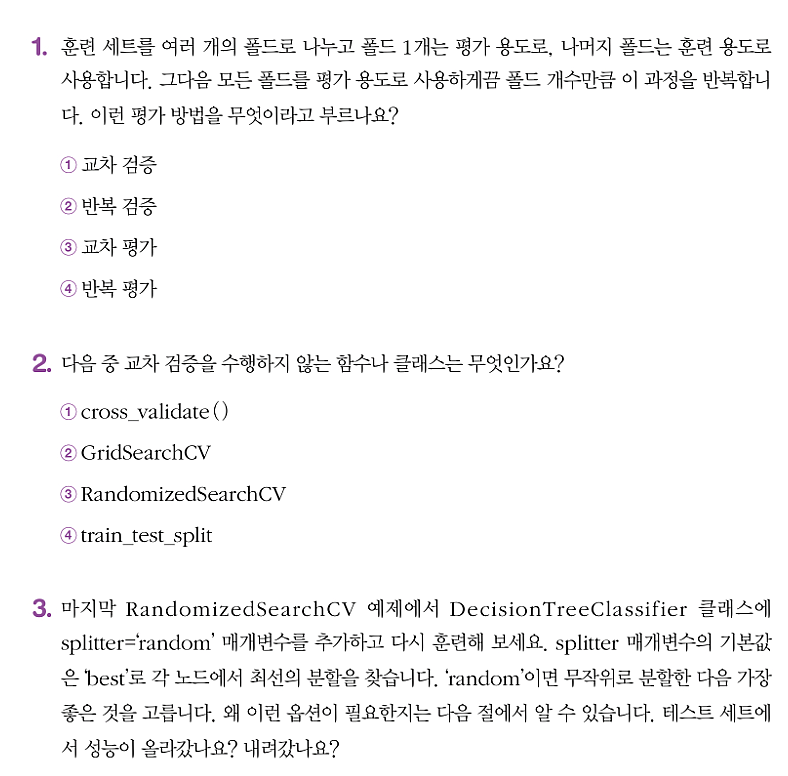

In [55]:
gs = RandomizedSearchCV(DecisionTreeClassifier(random_state=42, splitter='random'), params, 
                        n_iter=100, n_jobs=-1, random_state=42)
gs.fit(train_input, train_target)

RandomizedSearchCV(estimator=DecisionTreeClassifier(random_state=42,
                                                    splitter='random'),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000022C3C629070>,
                                        'min_impurity_decrease': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000022C3C5CA6A0>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000022C3C629700>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000022C3C611C70>},
                   random_state=42)

In [56]:
dt = gs.best_estimator_

In [57]:
dt.score(test_input, test_target)

0.786923076923077